In [1]:
import numpy as np
import seaborn as sns
import random
from tqdm import tqdm_notebook

In [2]:
post_a = None
post_b = None
bandit = None
total_reward = 0
c = 3


def agent(observation, configuration):
    global reward_sums, total_reward, bandit, post_a, post_b, c
    n_bandits = configuration.banditCount

    if observation.step == 0:
        post_a = np.ones(n_bandits)
        post_b = np.ones(n_bandits)
    else:
        r = observation.reward - total_reward
        total_reward = observation.reward

        # Update Gaussian posterior
        post_a[bandit] += r
        post_b[bandit] += (1 - r)
    samples = np.random.beta(post_a, post_b)
    bandit = int(np.argmax(samples))
    #plot_arm_dist(bandit)
    return bandit, post_a, post_b

In [3]:
n_bandits = 100

### Observation
```json
"observation": {
        "remainingOverageTime": 60,
        "step": 4,
        "agentIndex": 0,
        "reward": 3,
        "lastActions": [94,3]
    }
```

In [4]:
class bandit_observation(object):
    def __init__(self):
        self.step = 0
        self.agentIndex = 0
        self.reward = 0
        self.lastActions = []

### Configuration

```json
"configuration": {
        "episodeSteps": 2000,
        "actTimeout": 0.25,
        "runTimeout": 1200,
        "banditCount": 100,
        "decayRate": 0.97,
        "sampleResolution": 100
    }

```

In [5]:
class bandit_configuration(object):
    def __init__(self):
        self.episodeSteps= 2000
        self.banditCount = 100
        self.decayRate = 0.97
        self.sampleResolution = 100

In [6]:
def plot_arm_dist(arm, post_a, post_b):
    from scipy.stats import beta
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 1)
    a = post_a[arm]
    b = post_b[arm]
    mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
    x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
    ax.plot(x, beta.pdf(x, a, b), 'r-', lw=3, alpha=0.6, label=f"Distribution for arm {arm}")
    r = beta.rvs(a, b, size=1000)
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    plt.show()
    return None

## Simulation Scenario

In [7]:
def give_rewards():
    #return random.randint(0,1)
    return np.random.choice([0,1], size=None, replace=True, p=[1-reward_odds, reward_odds])

In [8]:
reward_odds =0.3

In [9]:
observa = bandit_observation()
configura = bandit_configuration()
configura.decayRate

0.97

In [10]:
configura.episodeSteps = 2000

100
Posterior A: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 3. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 1. 1. 2. 1. 1. 2. 5. 1. 1. 4. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 5. 1. 1. 1. 2. 5. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 2.
 1. 1. 2. 1.]
Posterior B: [2. 2. 1. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 1. 2. 2. 2. 1. 1. 2. 1. 2. 2. 1. 2. 2.
 1. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1. 1. 1. 2.
 2. 2. 2. 1.]


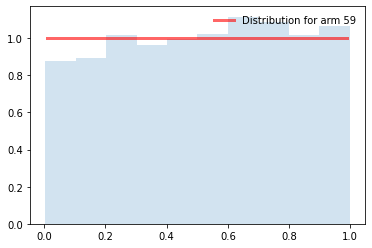

200
Posterior A: [1. 1. 1. 3. 1. 1. 3. 2. 1. 2. 2. 1. 1. 3. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 1. 1. 2. 3. 1. 1. 1. 2. 3. 1. 1. 2. 1. 1. 1. 3. 2. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 2. 2. 1. 1. 3. 1. 1. 2. 6. 1. 1. 7. 1. 2. 1. 1. 5. 2. 1. 1. 1. 1.
 1. 2. 1. 1. 6. 1. 2. 1. 4. 5. 1. 3. 1. 1. 1. 3. 1. 1. 1. 1. 2. 2. 1. 3.
 1. 2. 2. 2.]
Posterior B: [2. 2. 2. 2. 2. 2. 3. 2. 2. 3. 3. 3. 2. 2. 2. 2. 3. 2. 2. 2. 2. 3. 2. 2.
 2. 2. 3. 3. 2. 3. 2. 3. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 4. 2. 2. 4. 3. 2. 2. 3. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 3. 2. 2. 2. 4. 4. 2. 3. 2. 2. 3. 2. 3. 3. 2. 2. 3. 1. 3. 2.
 2. 3. 2. 2.]


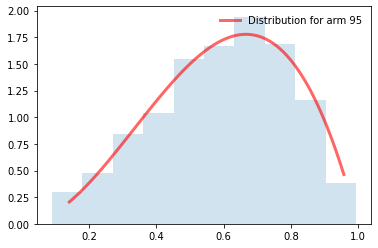

300
Posterior A: [1. 1. 1. 4. 1. 1. 3. 2. 1. 2. 2. 1. 1. 4. 2. 1. 1. 1. 1. 1. 1. 4. 1. 1.
 2. 1. 2. 3. 3. 1. 2. 2. 3. 1. 1. 3. 1. 2. 1. 3. 3. 1. 2. 2. 1. 1. 1. 1.
 2. 1. 5. 3. 1. 2. 3. 1. 1. 4. 6. 1. 1. 8. 1. 2. 1. 1. 5. 3. 1. 1. 1. 1.
 1. 2. 1. 1. 8. 1. 2. 1. 4. 5. 1. 3. 1. 3. 1. 3. 1. 1. 1. 3. 2. 3. 1. 3.
 2. 2. 2. 2.]
Posterior B: [3. 3. 2. 3. 2. 2. 3. 4. 3. 3. 3. 3. 3. 3. 4. 2. 3. 3. 3. 3. 2. 4. 2. 2.
 3. 2. 3. 3. 3. 3. 3. 3. 4. 3. 2. 3. 3. 2. 2. 3. 3. 3. 3. 2. 2. 4. 2. 2.
 3. 2. 3. 3. 3. 2. 4. 3. 2. 3. 4. 4. 2. 5. 3. 4. 2. 4. 4. 3. 2. 2. 3. 3.
 3. 4. 3. 2. 6. 3. 5. 3. 4. 4. 2. 4. 3. 3. 3. 3. 3. 3. 2. 2. 4. 3. 3. 4.
 3. 4. 4. 3.]


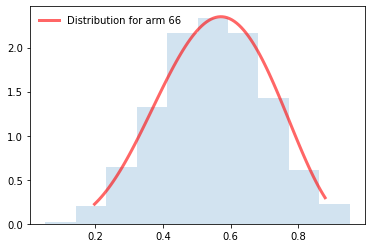

400
Posterior A: [1. 1. 1. 4. 2. 1. 5. 2. 1. 2. 2. 1. 1. 4. 2. 2. 1. 1. 1. 1. 2. 5. 1. 2.
 2. 2. 2. 3. 3. 1. 2. 2. 3. 1. 1. 3. 1. 2. 1. 3. 3. 1. 2. 2. 2. 1. 3. 1.
 2. 2. 5. 4. 1. 2. 3. 1. 2. 4. 8. 1. 1. 8. 1. 3. 1. 1. 6. 4. 1. 2. 1. 1.
 1. 2. 1. 2. 8. 1. 2. 1. 4. 6. 1. 3. 1. 3. 1. 6. 1. 1. 1. 4. 2. 3. 1. 3.
 2. 2. 2. 2.]
Posterior B: [3. 3. 2. 5. 2. 3. 5. 4. 3. 3. 3. 3. 4. 6. 4. 3. 3. 3. 4. 3. 4. 6. 3. 3.
 4. 3. 4. 4. 4. 3. 4. 4. 5. 3. 3. 4. 3. 4. 3. 4. 3. 3. 5. 4. 3. 4. 5. 3.
 4. 4. 4. 3. 4. 3. 4. 3. 4. 4. 5. 4. 3. 6. 3. 4. 3. 4. 5. 4. 3. 3. 4. 3.
 3. 5. 3. 5. 7. 3. 5. 3. 4. 6. 4. 4. 3. 4. 3. 4. 3. 4. 3. 3. 4. 3. 3. 4.
 4. 4. 4. 4.]


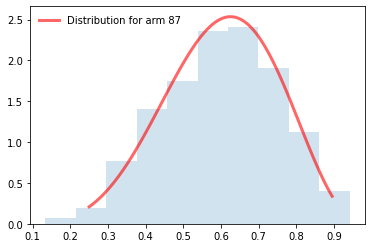

500
Posterior A: [1. 3. 1. 4. 3. 1. 5. 3. 1. 4. 3. 1. 1. 4. 2. 2. 1. 1. 1. 1. 2. 5. 1. 2.
 2. 2. 2. 3. 4. 2. 2. 2. 3. 1. 1. 3. 1. 2. 2. 4. 5. 2. 2. 2. 2. 1. 3. 1.
 2. 2. 8. 4. 1. 3. 4. 1. 2. 5. 8. 1. 2. 8. 1. 4. 1. 1. 6. 4. 3. 5. 1. 2.
 1. 2. 1. 2. 8. 1. 2. 2. 4. 7. 1. 3. 1. 3. 1. 7. 2. 1. 1. 4. 2. 6. 2. 3.
 2. 2. 2. 2.]
Posterior B: [3. 4. 4. 5. 5. 4. 6. 5. 3. 5. 4. 3. 4. 7. 5. 3. 3. 3. 4. 4. 5. 7. 3. 4.
 6. 4. 4. 4. 5. 3. 5. 4. 5. 3. 3. 5. 3. 4. 3. 6. 5. 4. 5. 4. 4. 4. 6. 3.
 4. 4. 5. 5. 4. 4. 5. 3. 4. 5. 7. 4. 3. 6. 3. 5. 4. 4. 6. 5. 4. 5. 4. 3.
 4. 5. 4. 5. 7. 3. 5. 3. 5. 7. 4. 4. 3. 5. 4. 6. 3. 4. 3. 5. 4. 6. 3. 6.
 5. 5. 4. 5.]


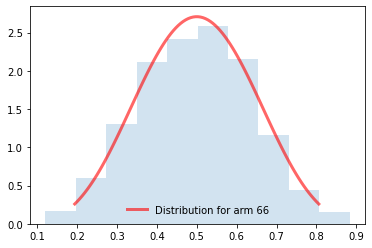

600
Posterior A: [ 1.  3.  1.  4.  4.  1.  6.  4.  2.  4.  4.  1.  2.  4.  2.  2.  2.  2.
  1.  1.  2.  5.  1.  2.  2.  4.  2.  3.  5.  3.  3.  2.  3.  1.  1.  3.
  1.  2.  5.  4.  5.  2.  3.  2.  2.  1.  3.  1.  2.  2.  9.  4.  1.  3.
  4.  2.  2.  5.  9.  1.  2. 10.  1.  4.  1.  1.  6.  4.  3.  5.  1.  2.
  1.  2.  1.  2. 10.  1.  2.  2.  4.  9.  1.  4.  1.  3.  1.  8.  2.  1.
  1.  4.  2.  7.  2.  3.  2.  2.  2.  2.]
Posterior B: [3. 6. 4. 5. 5. 4. 8. 5. 4. 5. 6. 4. 4. 7. 5. 5. 3. 4. 4. 4. 5. 7. 3. 6.
 6. 4. 5. 5. 6. 4. 5. 5. 6. 4. 3. 6. 4. 5. 5. 6. 7. 5. 5. 5. 4. 4. 7. 4.
 5. 4. 8. 6. 4. 5. 6. 5. 5. 6. 9. 4. 4. 9. 4. 5. 5. 4. 8. 5. 4. 5. 4. 5.
 4. 5. 4. 5. 8. 3. 5. 4. 6. 8. 4. 7. 3. 6. 4. 7. 5. 4. 3. 6. 5. 7. 6. 6.
 5. 5. 4. 5.]


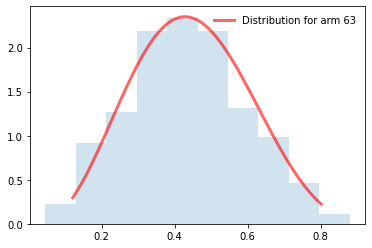

700
Posterior A: [ 1.  3.  1.  4.  5.  1.  6.  5.  3.  4.  4.  1.  2.  4.  2.  2.  2.  2.
  1.  2.  2.  6.  1.  2.  2.  4.  2.  3.  5.  3.  3.  2.  3.  1.  2.  3.
  1.  2.  5.  4.  5.  2.  3.  2.  2.  2.  3.  1.  2.  3.  9.  4.  1.  4.
  5.  2.  2.  5. 10.  1.  3. 10.  4.  5.  1.  1.  6.  4.  3.  5.  2.  4.
  1.  3.  1.  2. 10.  2.  2.  3.  4.  9.  1.  4.  2.  3.  2.  9.  2.  1.
  1.  4.  2.  7.  2.  3.  2.  3.  3.  2.]
Posterior B: [ 4.  6.  4.  6.  6.  5.  9.  7.  5.  6.  7.  5.  5.  7.  5.  6.  6.  5.
  5.  4.  5.  9.  3.  6.  6.  7.  5.  6.  6.  5.  6.  5.  7.  4.  5.  6.
  4.  6.  7.  7.  7.  5.  6.  5.  5.  4.  7.  5.  5.  5. 11.  7.  4.  5.
  7.  5.  5.  6. 11.  4.  6. 10.  6.  7.  5.  4.  8.  7.  7.  7.  4.  6.
  4.  5.  4.  5.  9.  4.  5.  5.  6. 10.  4.  8.  3.  6.  4.  9.  5.  5.
  4.  7.  5.  8.  6.  6.  6.  5.  4.  6.]


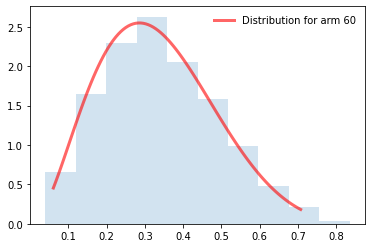

800
Posterior A: [ 1.  3.  1.  4.  5.  1.  6.  5.  4.  4.  5.  1.  2.  4.  2.  2.  2.  2.
  1.  2.  2.  6.  2.  2.  2.  4.  2.  3.  5.  4.  4.  2.  3.  1.  2.  4.
  1.  2.  8.  4.  5.  2.  3.  2.  2.  2.  3.  1.  2.  3.  9.  4.  3.  8.
  5.  2.  3.  6. 10.  3.  3. 12.  4.  5.  1.  1.  6.  4.  3.  5.  2.  4.
  2.  3.  1.  2. 10.  6.  2.  3.  4. 10.  1.  4.  2.  3.  2. 10.  2.  1.
  1.  4.  3.  7.  2.  3.  2.  3.  5.  2.]
Posterior B: [ 4.  6.  5.  7.  7.  5. 10.  8.  5.  6.  7.  5.  6.  8.  5.  6.  6.  5.
  5.  5.  6. 10.  4.  6.  6.  7.  7.  6.  8.  6.  6.  5.  7.  6.  6.  7.
  5.  6.  8.  7.  8.  6.  6.  5.  5.  5.  7.  5.  5.  6. 12.  8.  6.  8.
  8.  7.  5.  9. 12.  4.  7. 13.  6.  8.  5.  4.  8.  8.  8.  8.  5.  6.
  4.  6.  4.  5. 10.  8.  6.  7.  7. 11.  4.  8.  6.  6.  4. 10.  5.  5.
  4.  7.  5. 10.  6.  7.  6.  5.  6.  6.]


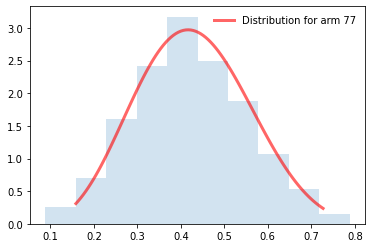

900
Posterior A: [ 1.  3.  1.  4.  7.  2.  6.  6.  5.  4.  5.  2.  2.  4.  2.  2.  2.  2.
  1.  2.  2.  6.  2.  2.  2.  4.  2.  3.  5.  4.  4.  3.  3.  1.  2.  5.
  1.  2.  8.  4.  5.  2.  3.  2.  2.  2.  3.  1.  2.  3.  9.  6.  3.  9.
  5.  2.  4.  6. 10.  3.  3. 13.  5.  5.  1.  1.  6.  4.  3.  6.  3.  5.
  2.  3.  1.  2. 11.  7.  2.  3.  4. 10.  1.  4.  2.  3.  3. 11.  2.  1.
  1.  5.  3.  7.  2.  4.  2.  3. 14.  2.]
Posterior B: [ 4.  6.  5.  8.  7.  5. 11.  9.  6.  7.  8.  5.  6.  9.  5.  6.  7.  5.
  5.  6.  7. 10.  5.  6.  6.  8.  7.  7.  8.  6.  7.  6.  7.  6.  7.  7.
  5.  6. 10.  8. 10.  6.  7.  6.  6.  6.  8.  5.  5.  7. 13.  8.  7. 11.
  8.  7.  6.  9. 12.  6.  8. 16.  8.  9.  6.  4.  9.  8.  8.  9.  6.  7.
  5.  6.  4.  5. 11.  9.  7.  7.  8. 14.  4.  8.  6.  6.  6. 13.  5.  5.
  4.  8.  7. 10.  6.  7.  6.  6. 10.  6.]


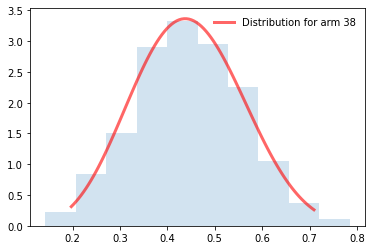

1000
Posterior A: [ 1.  5.  1.  4.  9.  2.  6.  6.  7.  6.  5.  2.  2.  4.  2.  2.  2.  3.
  1.  2.  2.  7.  3.  2.  2.  5.  2.  3.  5.  4.  4.  3.  3.  1.  2.  5.
  1.  2.  8.  4.  5.  2.  3.  2.  2.  2.  3.  1.  2.  4.  9.  6.  3.  9.
  6.  2.  5.  6. 10.  4.  3. 13.  5.  5.  2.  2.  6.  5.  3.  6.  3.  6.
  2.  3.  1.  2. 12.  8.  2.  3.  4. 10.  1.  4.  2.  3.  3. 11.  4.  1.
  1.  6.  3.  7.  2.  4.  4.  3. 16.  2.]
Posterior B: [ 4.  8.  5.  9. 10.  5. 11.  9.  8.  8.  9.  6.  6.  9.  7.  6.  7.  8.
  5.  6.  7. 10.  5.  6.  6.  9.  7.  8.  9.  7.  8.  7.  7.  7.  7.  8.
  6.  6. 12.  8. 10.  6.  8.  6.  6.  7.  8.  5.  7.  8. 13.  9.  8. 13.
  9.  7.  8. 10. 12.  7.  9. 16.  8.  9.  6.  5. 10.  8.  8. 10.  7. 10.
  6.  7.  4.  6. 11.  9.  7.  7.  8. 14.  5.  8.  7.  8.  7. 15.  6.  5.
  5.  9.  7. 10.  7.  8.  6.  7. 15.  7.]


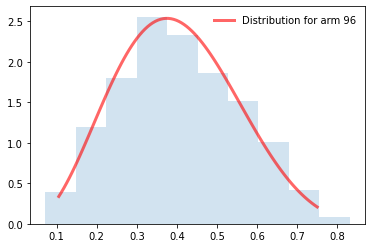

1100
Posterior A: [ 3.  5.  1.  4. 11.  2.  6.  7.  9.  6.  5.  4.  2.  4.  2.  2.  2.  3.
  1.  2.  2.  8.  3.  2.  3.  5.  2.  3.  5.  4.  4.  3.  3.  1.  2.  6.
  1.  2.  8.  4.  5.  2.  4.  2.  2.  2.  3.  2.  2.  5.  9.  6.  3. 10.
  6.  2.  6.  6. 11.  4.  3. 13.  6.  5.  2.  2.  6.  5.  5.  6.  3.  6.
  2.  3.  1.  2. 13.  9.  2.  3.  4. 11.  1.  4.  2.  3.  3. 11.  4.  1.
  1.  7.  3.  7.  2.  5.  4.  3. 16.  2.]
Posterior B: [ 5. 10.  5.  9. 12.  5. 11. 10. 11. 10.  9.  7.  6.  9.  7.  6.  7.  9.
  5.  6.  7. 11.  6.  7.  6.  9.  7.  8.  9. 10.  9.  8.  7.  7.  7. 10.
  6.  7. 13.  9. 11.  7.  8.  7.  7.  7.  8.  6.  7.  9. 14.  9.  8. 13.
 11.  8. 10. 11. 14.  8.  9. 17.  9.  9.  6.  6. 10. 10.  8. 10.  8. 10.
  6.  7.  5.  6. 15. 11.  7.  7.  9. 14.  6. 11.  7.  8.  8. 16.  8.  5.
  5.  9.  7. 11.  8.  9.  7.  7. 21.  7.]


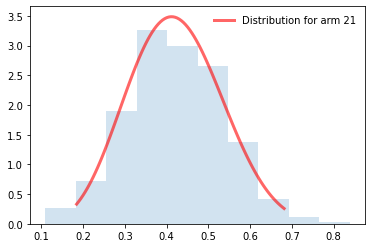

1200
Posterior A: [ 4.  5.  1.  4. 13.  4.  6.  9.  9.  6.  5.  4.  2.  4.  2.  2.  2.  3.
  1.  2.  2.  8.  8.  3.  4.  7.  2.  3.  5.  5.  4.  3.  4.  1.  2.  8.
  1.  2.  9.  5.  5.  2.  4.  2.  2.  2.  3.  2.  2.  5.  9.  6.  3. 10.
  6.  2.  6.  6. 12.  4.  3. 13.  6.  5.  2.  3.  6.  5.  5.  6.  3.  6.
  3.  3.  1.  2. 13. 11.  3.  3.  4. 11.  1.  4.  2.  3.  3. 11.  4.  1.
  2.  8.  3.  9.  2.  5.  4.  3. 16.  2.]
Posterior B: [ 7. 11.  5.  9. 13.  7. 11. 11. 13. 10.  9.  8.  8.  9.  7.  6.  8.  9.
  5.  6.  7. 12.  7.  8.  9.  9.  8.  9. 10. 10.  9.  8.  8.  7.  8. 12.
  6.  7. 14. 10. 11.  7. 10.  7.  7.  7.  8.  6.  7.  9. 15. 10.  8. 15.
 13.  8. 11. 12. 14.  9.  9. 18. 11. 11.  7.  6. 10. 10.  9. 10.  8. 11.
  7.  7.  5.  7. 17. 12.  8.  8.  9. 15.  6. 11.  7.  9.  8. 16.  9.  7.
  7. 12.  8. 12.  8.  9.  8.  8. 21.  7.]


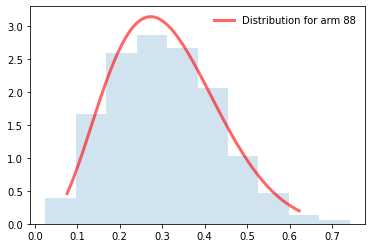

1300
Posterior A: [ 4.  5.  1.  4. 16.  4.  6. 11. 10.  6.  5.  4.  2.  4.  2.  2.  2.  3.
  2.  2.  2.  9.  8.  3.  5.  7.  2.  3.  5.  6.  4.  3.  4.  1.  2.  8.
  1.  5.  9.  5.  5.  2.  4.  2.  2.  2.  3.  2.  2.  5.  9.  7.  3. 10.
  6.  2.  6.  6. 16.  4.  4. 13.  6.  5.  2.  3.  6.  6.  5.  6.  5.  6.
  3.  3.  1.  2. 14. 11.  3.  3.  4. 11.  1.  4.  3.  3.  4. 11.  4.  1.
  3.  8.  4.  9.  2.  6.  4.  3. 17.  2.]
Posterior B: [ 8. 12.  5.  9. 19.  8. 11. 14. 13. 11. 11.  8.  9.  9.  7.  6.  8.  9.
  5.  6.  7. 12. 12.  8.  9. 10.  8.  9. 10. 11. 10.  8. 10.  7.  8. 14.
  7.  9. 15. 10. 11.  8. 10.  8.  7.  7.  8.  6.  7. 11. 16. 11. 10. 16.
 13.  8. 12. 12. 16. 10.  9. 18. 12. 11.  7.  8. 12. 11. 10. 11.  9. 11.
  7.  9.  5.  7. 18. 14.  8.  9.  9. 15.  6. 11.  8.  9.  9. 16. 11.  7.
  8. 13.  8. 13.  8. 10.  9.  8. 23.  7.]


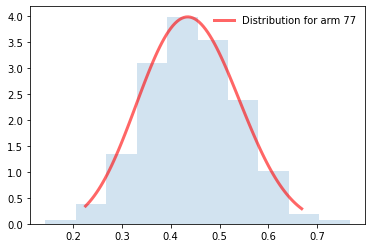

1400
Posterior A: [ 4.  5.  2.  5. 16.  6.  6. 11. 14.  6.  5.  4.  4.  4.  3.  3.  2.  3.
  2.  2.  2. 13. 10.  3.  6.  8.  2.  4.  5.  6.  4.  3.  4.  1.  2.  8.
  1.  5.  9.  5.  5.  2.  4.  2.  2.  2.  3.  2.  4.  5.  9.  7.  3. 10.
  6.  2.  6.  6. 17.  5.  4. 13.  6.  5.  2.  3.  6.  6.  5.  7.  6.  6.
  4.  3.  1.  3. 14. 11.  3.  3.  4. 12.  1.  4.  3.  3.  4. 12.  4.  1.
  4.  8.  4.  9.  2.  6.  6.  3. 17.  2.]
Posterior B: [10. 12.  7. 10. 20.  9. 12. 15. 15. 11. 11.  9.  9. 10.  7.  8.  8.  9.
  6.  7.  8. 14. 13.  8. 10. 12.  8. 10. 10. 12. 10.  8. 10.  7.  8. 14.
  7. 10. 16. 10. 12.  8. 10.  9.  7.  7.  8.  6.  9. 12. 16. 13. 10. 16.
 13. 10. 12. 12. 18. 11. 10. 18. 12. 11.  8.  9. 12. 12. 10. 12. 11. 11.
  9.  9.  6.  7. 18. 17.  8. 10.  9. 15.  6. 11.  9.  9.  9. 17. 11.  7.
  8. 14. 10. 17.  8. 11. 10.  8. 23.  8.]


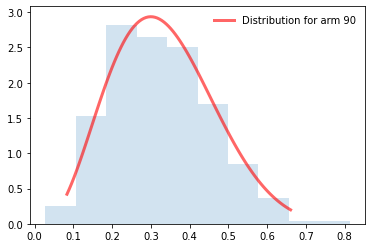

1500
Posterior A: [ 4.  6.  2.  5. 16.  7.  6. 11. 15.  7.  5.  4.  4.  4.  3.  3.  2.  3.
  2.  2.  2. 14. 11.  3.  6.  9.  2.  4.  5.  6.  4.  3.  4.  1.  2.  8.
  1.  5.  9.  7.  5.  2.  4.  4.  3.  3.  4.  2.  4.  5.  9.  7.  3. 11.
  6.  2.  6.  6. 20.  5.  4. 13.  6.  5.  3.  5.  6.  6.  6.  7.  6.  6.
  5.  3.  1.  3. 15. 11.  3.  3.  4. 13.  1.  4.  4.  3.  4. 12.  4.  1.
  5.  9.  4. 10.  2.  6.  6.  3. 17.  2.]
Posterior B: [11. 13.  7. 11. 21. 13. 12. 16. 19. 11. 11.  9.  9. 11.  7.  8.  8.  9.
  7.  7.  8. 18. 15.  8. 12. 15.  8. 10. 10. 14. 12.  9. 10.  7.  8. 14.
  7. 10. 16. 12. 12.  8. 11.  9.  8.  7.  9.  7. 10. 12. 16. 13. 10. 16.
 13. 11. 13. 12. 22. 12. 10. 19. 12. 12.  8.  9. 13. 13. 12. 13. 12. 11.
  9.  9.  7.  8. 19. 18.  8. 10. 10. 17.  6. 11.  9.  9. 10. 19. 11.  8.
 10. 14. 10. 17.  8. 11. 11. 10. 23. 10.]


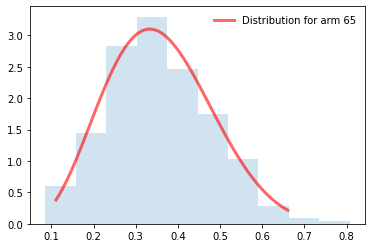

1600
Posterior A: [ 4.  6.  2.  5. 17.  7.  7. 11. 15.  8.  5.  5.  5.  4.  3.  3.  2.  3.
  2.  2.  3. 14. 12.  3.  6.  9.  2.  4.  5.  7.  4.  3.  4.  1.  2.  8.
  1.  6.  9.  7.  5.  2.  4.  4.  3.  3.  5.  2.  5.  5.  9.  7.  3. 12.
  7.  2.  6.  7. 20.  5.  4. 14.  6.  5.  3.  6.  6.  6.  6.  7.  6.  6.
  6.  3.  1.  3. 15. 11.  3.  3.  5. 13.  1.  4.  4.  3.  4. 12.  4.  1.
  5. 11.  4. 10.  2.  6.  6.  4. 17.  2.]
Posterior B: [11. 13.  8. 12. 21. 14. 12. 17. 23. 12. 11. 12. 10. 11.  7.  9.  8. 10.
  9.  8.  8. 19. 19.  9. 12. 15.  8. 11. 11. 15. 12. 10. 10.  7.  8. 15.
  8. 13. 16. 13. 12.  8. 11.  9.  8.  8. 10.  7. 10. 12. 16. 14. 10. 18.
 13. 11. 13. 12. 26. 13. 10. 19. 12. 12.  9. 11. 14. 13. 14. 14. 12. 13.
 12.  9.  7.  8. 21. 19.  8. 10. 11. 17.  6. 12. 11.  9. 11. 19. 11.  9.
 10. 19. 12. 18.  8. 13. 13. 10. 25. 10.]


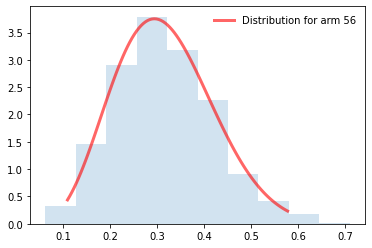

1700
Posterior A: [ 4.  6.  2.  5. 17.  7.  7. 11. 15. 13.  6.  6.  5.  4.  3.  3.  4.  3.
  3.  2.  3. 15. 12.  3.  7.  9.  2.  4.  5.  7.  4.  3.  4.  1.  2.  9.
  1.  6.  9.  7.  5.  2.  4.  4.  3.  3.  5.  3.  5.  5.  9.  8.  3. 13.
  8.  3.  7.  7. 20.  5.  4. 14.  6.  5.  3.  6.  6.  6.  7.  7.  7.  8.
  7.  3.  1.  3. 15. 11.  3.  3.  5. 13.  1.  4.  4.  5.  4. 12.  4.  1.
  5. 11.  4. 12.  3.  7.  6.  4. 18.  2.]
Posterior B: [12. 13.  8. 12. 22. 14. 14. 19. 24. 19. 13. 13. 13. 11.  8.  9.  9. 10.
  9.  8.  9. 20. 20. 10. 12. 16.  8. 11. 12. 15. 12. 10. 11.  7.  8. 15.
  8. 13. 17. 14. 12.  8. 12.  9. 10.  9. 11.  8. 11. 12. 16. 14. 10. 21.
 14. 11. 14. 15. 27. 13. 11. 20. 13. 12. 10. 12. 14. 13. 14. 14. 13. 14.
 14.  9.  7.  8. 22. 20. 11. 11. 12. 18.  6. 14. 11.  9. 11. 19. 11.  9.
 10. 21. 12. 18.  8. 13. 13. 10. 26. 10.]


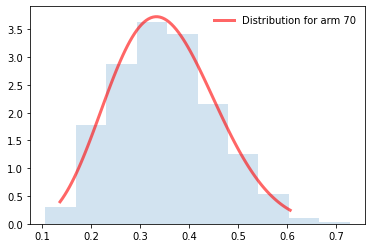

1800
Posterior A: [ 4.  6.  2.  7. 17.  7.  8. 11. 15. 13.  7.  6.  5.  4.  3.  5.  4.  3.
  3.  2.  3. 18. 12.  3.  7. 10.  2.  4.  5.  7.  4.  4.  4.  1.  2.  9.
  1.  7. 11.  7.  5.  2.  4.  4.  3.  3.  5.  4.  5.  5.  9.  8.  4. 13.
  9.  3.  7.  7. 20.  5.  4. 16.  6.  6.  3.  6.  6.  6.  7.  8.  7.  8.
  7.  3.  1.  3. 17. 11.  3.  3.  5. 16.  1.  4.  4.  5.  4. 14.  4.  1.
  9. 11.  4. 12.  3.  7.  6.  4. 18.  2.]
Posterior B: [12. 13.  9. 12. 23. 16. 14. 20. 24. 19. 14. 13. 13. 13.  8. 10. 10. 10.
  9.  8. 10. 23. 21. 11. 15. 17.  8. 11. 12. 16. 12. 12. 12.  7.  8. 15.
  8. 13. 18. 15. 12.  8. 13. 10. 10.  9. 11. 11. 11. 12. 17. 14. 11. 22.
 17. 11. 16. 15. 28. 14. 11. 22. 13. 12. 12. 13. 14. 13. 15. 14. 14. 14.
 14. 11.  7. 10. 24. 20. 11. 11. 12. 20.  8. 14. 11. 10. 11. 20. 11.  9.
 12. 21. 12. 20.  8. 15. 13. 11. 27. 10.]


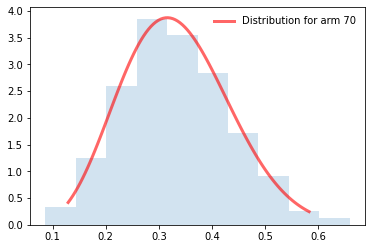

1900
Posterior A: [ 4.  7.  2.  7. 17.  7.  8. 11. 15. 13.  7.  6.  7.  4.  3.  5.  4.  3.
  3.  2.  3. 19. 13.  3.  7. 10.  2.  4.  5.  7.  4.  5.  4.  1.  2.  9.
  1.  9. 11.  8.  5.  2.  4.  4.  3.  3.  5.  4.  6.  5.  9. 12.  5. 14.
  9.  3.  7.  7. 20.  5.  5. 17.  7.  6.  3.  6.  6.  6.  7.  8.  7.  8.
  8.  4.  1.  3. 17. 11.  3.  3.  6. 19.  1.  4.  4.  6.  4. 14.  5.  1.
  9. 11.  4. 12.  3.  7.  7.  4. 18.  2.]
Posterior B: [12. 13.  9. 14. 26. 16. 16. 22. 25. 20. 15. 13. 13. 13. 10. 10. 10. 11.
 11.  8. 10. 26. 22. 11. 16. 17.  8. 11. 12. 16. 12. 12. 12.  7.  8. 15.
  8. 15. 19. 16. 13.  8. 13. 13. 10. 10. 12. 12. 13. 12. 17. 18. 11. 22.
 18. 11. 17. 15. 30. 14. 12. 24. 14. 13. 12. 13. 14. 13. 16. 16. 16. 15.
 16. 12.  7. 10. 24. 21. 11. 11. 12. 22.  8. 14. 11. 12. 12. 21. 11. 10.
 15. 21. 13. 20.  9. 15. 14. 11. 28. 10.]


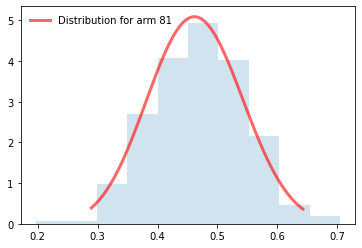

2000
Posterior A: [ 4.  7.  2.  7. 19.  7. 10. 11. 15. 13.  8.  6.  7.  4.  3.  6.  4.  3.
  3.  2.  4. 19. 13.  3.  7. 11.  2.  4.  7.  7.  4.  6.  4.  1.  2. 10.
  1.  9. 11.  8.  5.  2.  4.  4.  4.  3.  5.  4.  7.  5.  9. 16.  5. 14.
  9.  3.  7.  7. 20.  5.  5. 18.  7.  6.  3.  8.  6.  6.  8.  8.  7.  8.
  8.  4.  1.  3. 18. 11.  3.  3.  6. 20.  1.  4.  5.  6.  4. 14.  5.  1.
  9. 11.  4. 14.  3.  7.  7.  4. 18.  2.]
Posterior B: [12. 13.  9. 16. 27. 16. 17. 22. 25. 22. 17. 14. 13. 13. 11. 13. 11. 12.
 11.  8. 11. 26. 23. 12. 16. 18.  8. 11. 13. 17. 12. 13. 13.  8.  8. 16.
  8. 16. 19. 19. 14.  8. 13. 13. 10. 11. 12. 12. 14. 12. 17. 22. 13. 24.
 18. 11. 17. 16. 30. 14. 13. 26. 14. 15. 12. 15. 14. 13. 17. 17. 16. 15.
 18. 12.  7. 10. 26. 22. 12. 12. 13. 27.  8. 14. 12. 13. 12. 22. 11. 10.
 17. 22. 13. 22.  9. 15. 15. 11. 29. 10.]


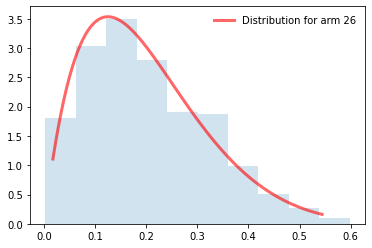

In [11]:
for n in range(configura.episodeSteps):
    arm_selection, p_a, p_b = agent(observa, configura)
    observa.reward += give_rewards()
    observa.step +=1
    
    if observa.step %100 == 0:
        print(observa.step)
        print(f"Posterior A: {p_a}")
        print(f"Posterior B: {p_b}")
        plot_arm_dist(arm_selection, p_a, p_b)